# LAYOUT ANALYSIS
## Bottom-Up methods
### MST

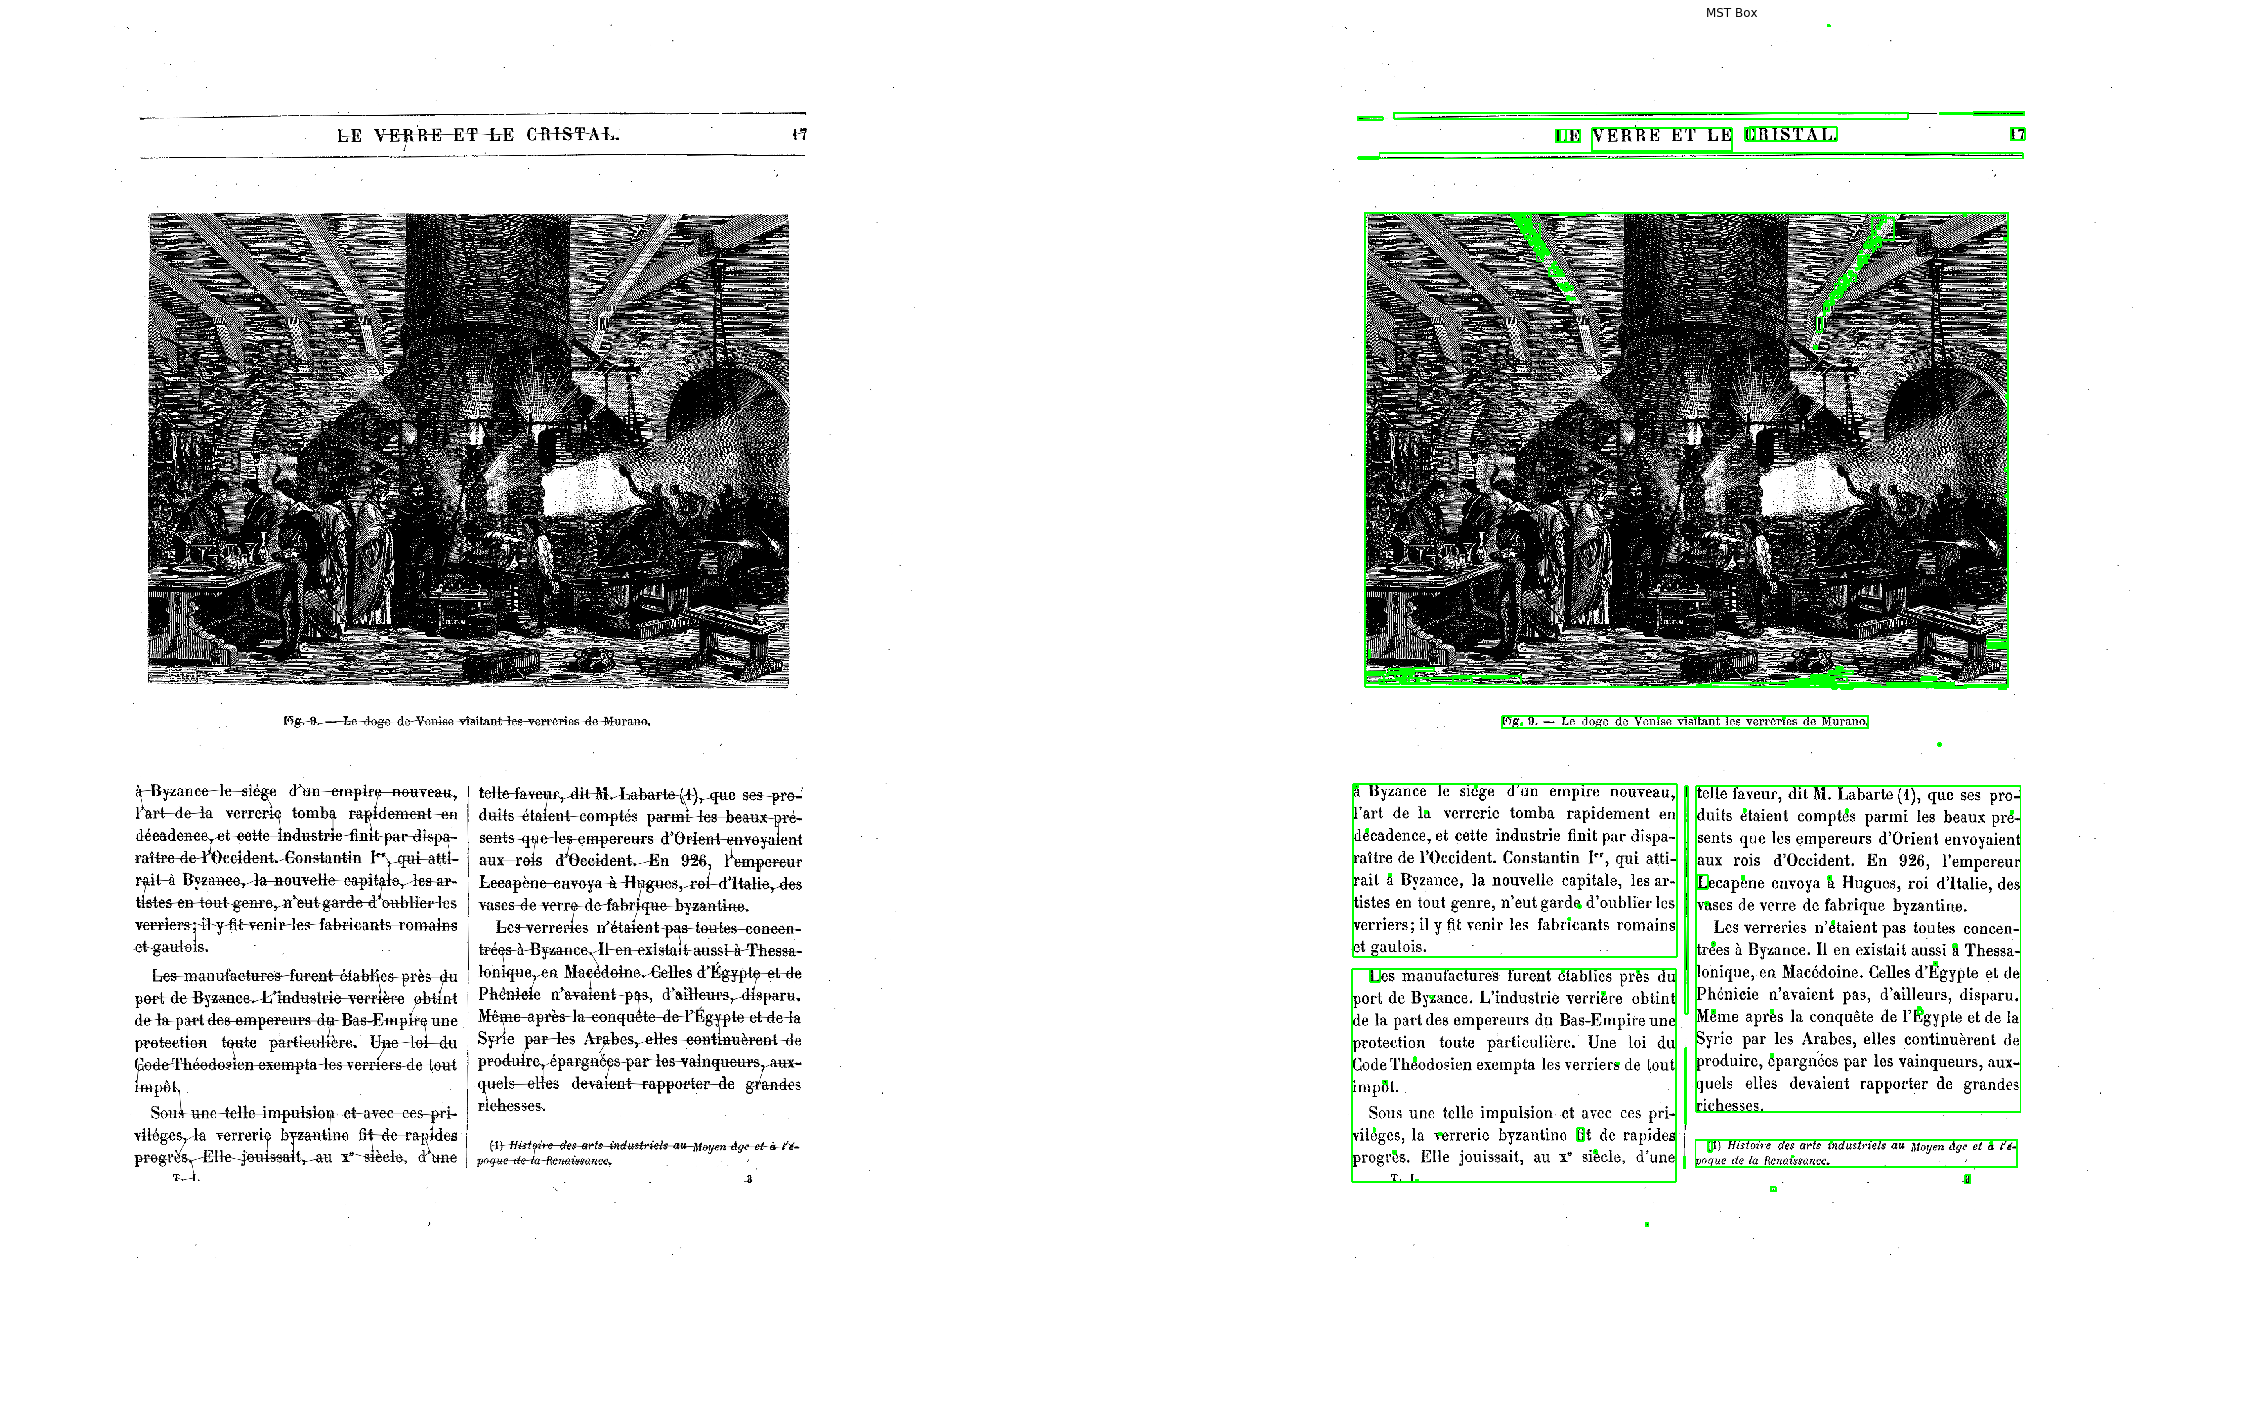

In [2]:
from Utils import *
from PreProcessing import * 
from LayoutAnalysis import *
import cv2
from matplotlib import pyplot as plt

img_name='prova1.tif'
path='images/'+img_name
img = cv2.imread(path)
img_centroids=img.copy()

img_bin = binarization('Otsu', img)
img_bin =removeFiguresOrSpots(img_bin,'spots')
img_bin =removeFiguresOrSpots(img_bin, 'linesBoth')
img2=img_bin.copy()

points = findCentroids(img2,img_centroids)
graph = kNeighborsGraph(points, 8)
k_kneighbors_edges = np.array(graph.nonzero()).T
k_kneighbors_distances = graph.data

my_peak_values = findPeaks(k_kneighbors_distances, True)

_,mst_edges = minimumSpanningTreeEdges(points,5, my_peak_values)
img_mst= plotEdges(img,mst_edges,points)
img_mst_box = img.copy()
printContours(binarization('Otsu', img_mst), img_mst_box, 3)

plt.figure(figsize=(40,40))
plt.subplot(1,2,1),plt.imshow(img_mst,'gray')
plt.title(''), plt.axis('off') 
plt.subplot(1,2,2),plt.imshow(img_mst_box,'gray')
plt.title('MST Box'), plt.axis('off')
plt.show()


### DocStrum

[19, 55]


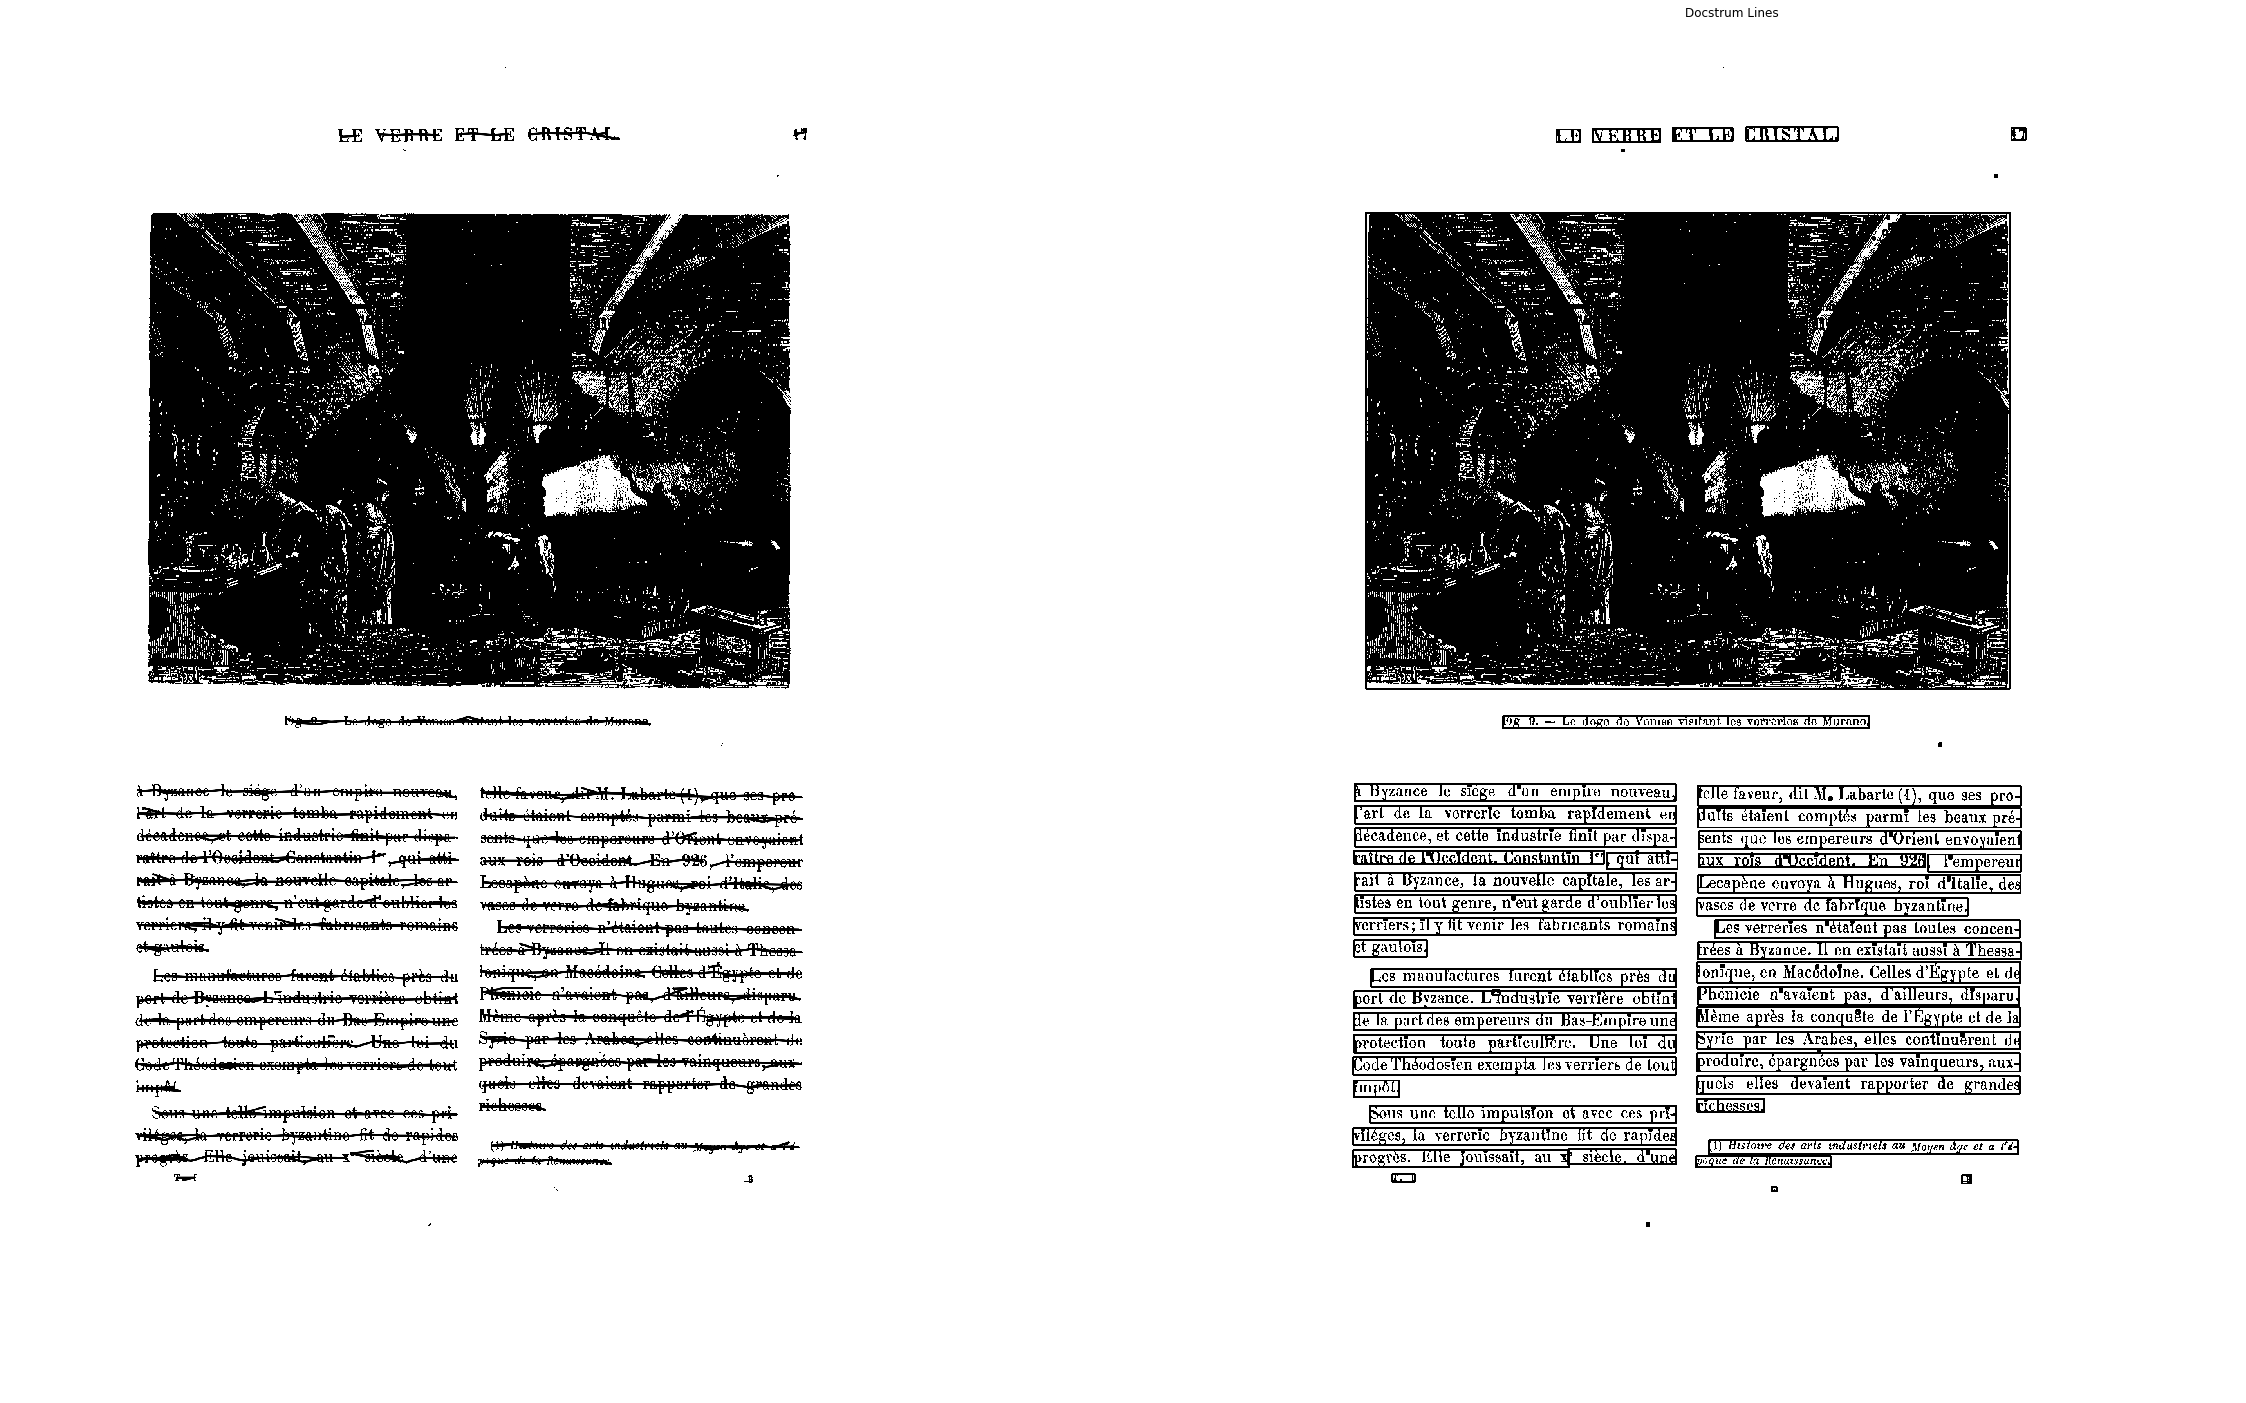

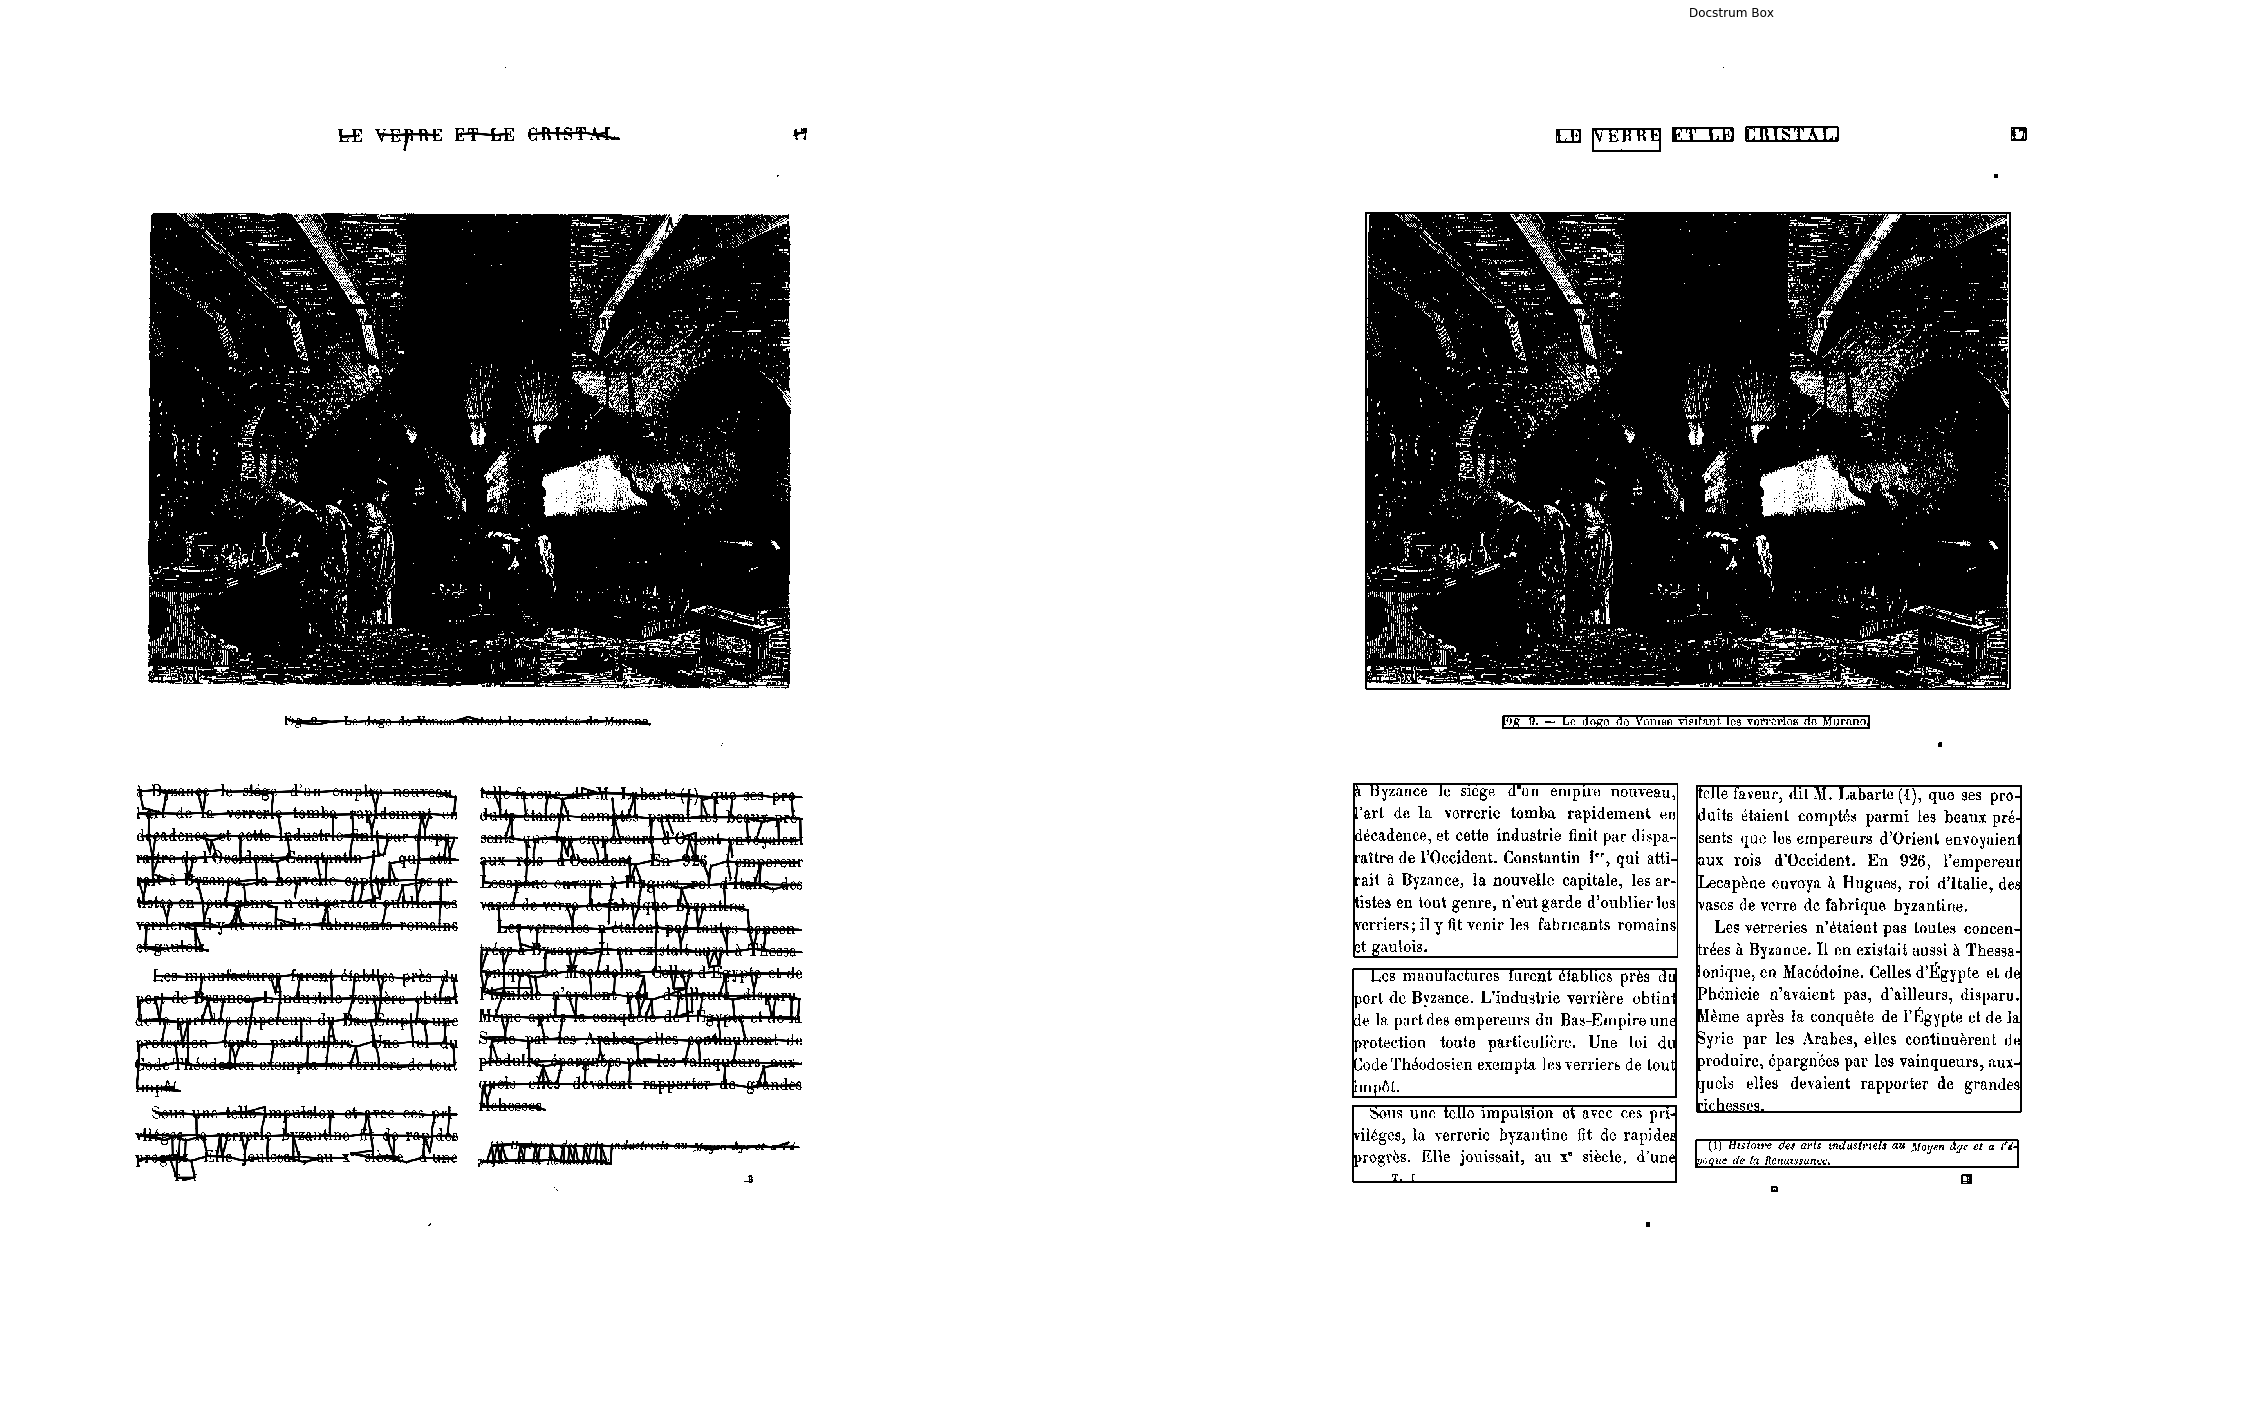

In [6]:
from Utils import *
from PreProcessing import * 
from LayoutAnalysis import *
import cv2
from matplotlib import pyplot as plt

img_name='prova1.tif'
path='images/'+img_name
img = cv2.imread(path)

#img_or1=img.copy()
#img_or2=img.copy()
img_bin = binarization('Otsu', img)
img_bin = removeFiguresOrSpots(img_bin, 'linesBoth')
img_bin=removeFiguresOrSpots(img_bin,'spots')
img_or1=img_bin.copy()
img_or2=img_bin.copy()
img_b1=img_bin.copy()
img_b2=img_bin.copy()

#printContours(img_b1,img_b1, 1)
points = findCentroids(img_b1,img_b1)

Graph = kNeighborsGraph(points,5)
k_kneighbors_edges = np.array(Graph.nonzero()).T
k_kneighbors_distances = Graph.data
my_peak_values = findPeaks(k_kneighbors_distances,25)

horizontal_edges, vertical_edges = edgesInformation(k_kneighbors_edges, points, k_kneighbors_distances)

#DOCSTRUM ORIZZONTALE
docstrum(img, img_b2, horizontal_edges, points, max(my_peak_values))

printContours(img_b2, img_or1, 3)

plt.figure(figsize=(40,40))
plt.subplot(1,2,1),plt.imshow(img_b2,'gray')
plt.title(''), plt.axis('off') 
plt.subplot(1,2,2),plt.imshow(img_or1,'gray')
plt.title('Docstrum Lines'), plt.axis('off')
plt.show()

#DOCSTRUM VERTICALE
docstrum(img, img_b2, vertical_edges, points, max(my_peak_values))

printContours(img_b2, img_or2, 3)

plt.figure(figsize=(40,40))
plt.subplot(1,2,1),plt.imshow(img_b2,'gray')
plt.title(''), plt.axis('off') 
plt.subplot(1,2,2),plt.imshow(img_or2,'gray')
plt.title('Docstrum Box'), plt.axis('off')
plt.show()

### Voronoi

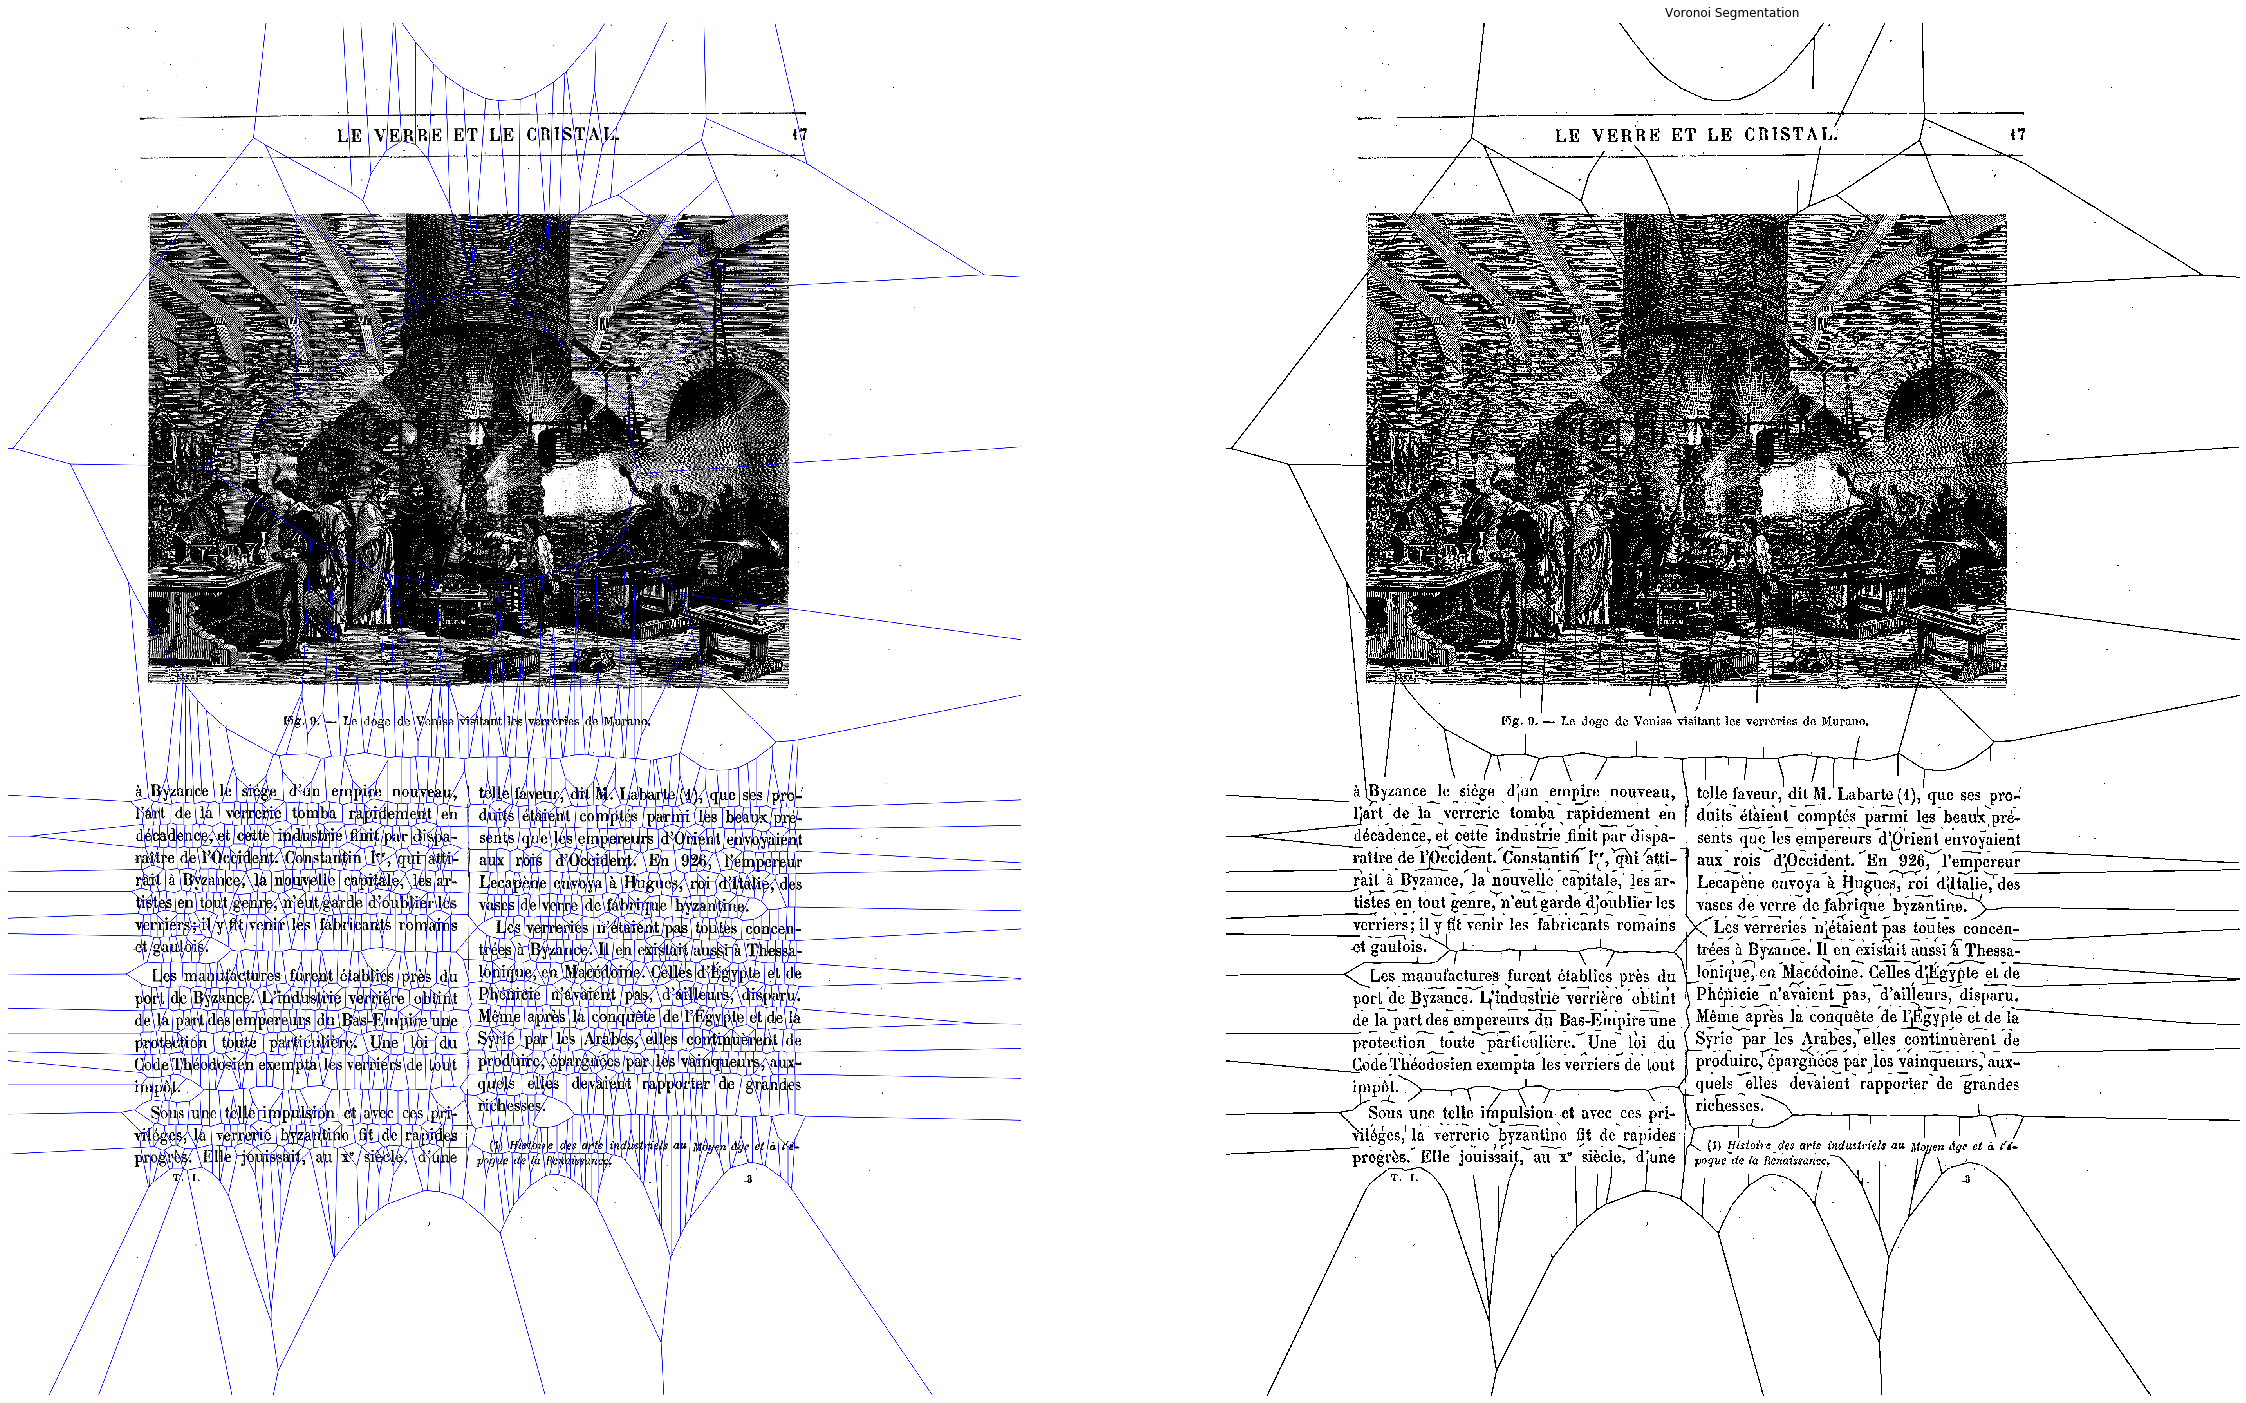

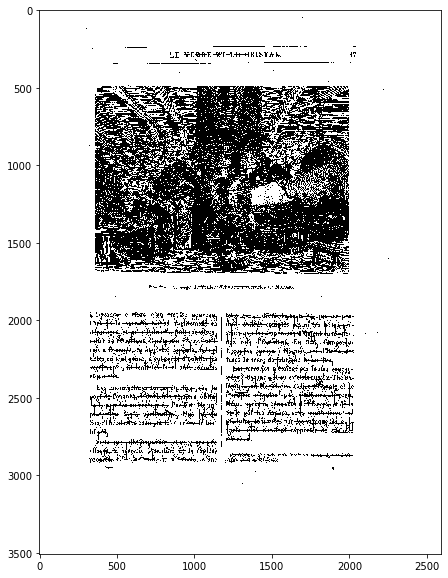

In [12]:
from Utils import *
from PreProcessing import * 
from LayoutAnalysis import *
import cv2
from matplotlib import pyplot as plt

img_name='prova1.tif'
path='images/'+img_name
img = cv2.imread(path)
img_bin = binarization('Otsu', img)
img_bin=removeFiguresOrSpots(img_bin,'spots')
img_bin=removeFiguresOrSpots(img_bin,'linesBoth')
img2=img_bin.copy()

points = findCentroids(img2,img2)

Graph = la.kNeighborsGraph(points,8)           
k_kneighbors_edges = ut.np.array(Graph.nonzero()).T
k_kneighbors_distances = Graph.data
my_Peak_Values = findPeaks(k_kneighbors_distances,20)

img_delaunay = img.copy()
bin_voro_edges, img_voro_full,img_voro_segmentation = voronoi(points, img_delaunay, my_Peak_Values)
voro_coord = ut.printContours(bin_voro_edges,bin_voro_edges.copy(),1)

plt.figure(figsize=(40,40))
plt.subplot(1,2,1),plt.imshow(img_voro_full,'gray')
plt.title(''), plt.axis('off') 
plt.subplot(1,2,2),plt.imshow(img_voro_segmentation,'gray')
plt.title('Voronoi Segmentation'), plt.axis('off')
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(bin_voro_edges,'gray')
plt.show()

## Top-Down methods 
### XY Tree

Name: A


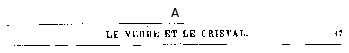

Name: B


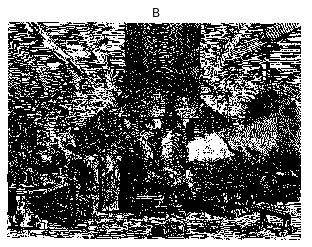

Name: C


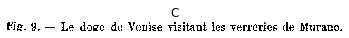

Name: D


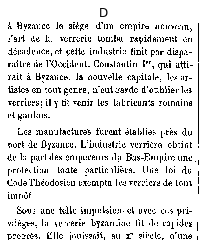

Name: E


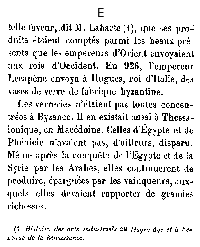

IGRAPH U--- 7 6 --
+ edges:
0--1 0--2 0--3 0--4 4--5 4--6


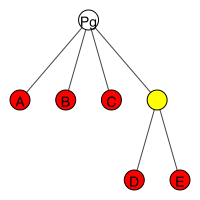

In [4]:
from Utils import *
from PreProcessing import * 
from LayoutAnalysis import *
import cv2
from matplotlib import pyplot as plt
from igraph import Graph, EdgeSeq

img_name='prova1.tif'
pathXY='images/XY_Tree'
path='images/'+img_name
img = cv2.imread(path)
img_bin = binarization('otsu',img)

info=cutImage(img_bin,50,40)
infoV=cutImage(img_bin,50,21,True)
XY_Tree = Graph()
XY_Tree, typeNode, label=cutMatrix(img_name, pathXY, img_bin, info, infoV, XY_Tree)

XY_Tree.vs["type"] = typeNode
XY_Tree.vs["label"] = label
color_dict = {"root": "white", "leaf": "red", "node": "yellow"}
XY_Tree.vs["color"] = [color_dict[type] for type in XY_Tree.vs["type"]]

layout = XY_Tree.layout_reingold_tilford(mode="in", root=0)
igraph.plot(XY_Tree, layout = layout, bbox = (200, 200), margin = 20)
#out.save('Tree.png')

# Text Recognition
## Pytesseract

number of black pixel: 7 %


/opt/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:603: UserWarning: Metadata Warning, tag 282 had too many entries: 2, expected 1
  % (tag, len(values))
/opt/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:603: UserWarning: Metadata Warning, tag 283 had too many entries: 2, expected 1
  % (tag, len(values))


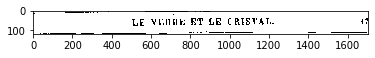

LE VERRE ET LE CRISTAL.
number of black pixel: 70 %


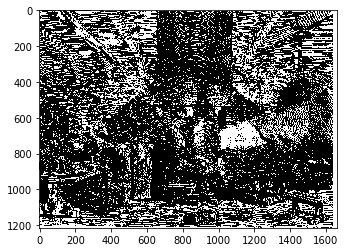

IMAGE
number of black pixel: 25 %


/opt/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:603: UserWarning: Metadata Warning, tag 282 had too many entries: 2, expected 1
  % (tag, len(values))
/opt/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:603: UserWarning: Metadata Warning, tag 283 had too many entries: 2, expected 1
  % (tag, len(values))


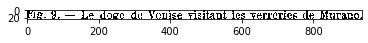

Fis, 9. — [Le doge de Venise visitant jes verremes de Murano.
number of black pixel: 12 %


/opt/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:603: UserWarning: Metadata Warning, tag 282 had too many entries: 2, expected 1
  % (tag, len(values))
/opt/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:603: UserWarning: Metadata Warning, tag 283 had too many entries: 2, expected 1
  % (tag, len(values))


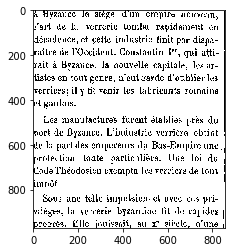

a Byzance le slege dun empire nouveau,
Yart de la verrerie tomba rapidement en
décadence, et cette industrie finit par dispa-
raitre de ’Occident. Constantin I", qui atti-
rail 4 Byzance, la nouvelle capitale, les ar-
tistes en tout genre, n’eut garde d’oublier les
verriers; il y fit venir les fabricants romains
et gaulois.

Les manufactures furent établies prés du
port de Byzance. L’industrie verriére obtint
de la part des empereurs du Bas-Empire une |
protection toute particuligre. Une loi du |
Code Théodosien exempta les verriers de tout
impot. .

Sous une telle impulsion. et avec ces pri-
viléges, la verrerie byzantine fit de rapides |
progres, Elle jonissaif, au x°® siécle, d’une
number of black pixel: 12 %


/opt/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:603: UserWarning: Metadata Warning, tag 282 had too many entries: 2, expected 1
  % (tag, len(values))
/opt/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:603: UserWarning: Metadata Warning, tag 283 had too many entries: 2, expected 1
  % (tag, len(values))


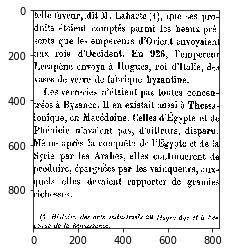

telle faveur, dit M. Labarte (1), que ses pro-
duits étaient comptés parmi les beaux pré-
sents que les empereurs d’Orient envoyaient
aux rois d'Occident, En 926, Vempereur
Lecapéne envoya 4 Hugues, roi d’Italie, des
vases de verre de fabrique byzantine.

Les verreries n’étaient pas toutes concen-
trées 4 Byzance. Il en existait aussi 4 Thessa-
lonique,.en Macédoine. Celles d’Egypte et de
Phénicie n’ayaient pas, Wailleurs, disparu.
Méme apres la conquéte de l’Egypte et de la
Syrie par les Arabes, elles continuérent de
produire, épargnées par les vainqueurs, aux-
quels elles devaient rapporter de grandes
richesses.

(1) Histotre des arts industriels au Moyen age eta Ue
nogue de ia Renaissance,


<_io.TextIOWrapper name='SaveText.txt' mode='w' encoding='UTF-8'>

In [5]:
from Utils import *
from PreProcessing import * 
from LayoutAnalysis import *

path= 'images/XY_Tree'
namesfile='*_finalCut*.tif'
outputfile='SaveText.txt'

getTextFile(path,namesfile,outputfile)